### Données :

Données issues de l'ADEME (3 premiers jeux de données) et de AVATAR (information sur le traffic routiers)
    <ul>
        <li>Inventaire de gaz à effet de serre territorialisé</li>
        <li>Bilan GES</li>
        <li>ALDO - flux 1 - flux total et surfaces converties</li>
        <li>Données AVATAR</li>
    </ul>

In [1]:
import pandas as pd
import numpy as np


In [2]:
inventaire_ges = pd.read_csv("https://data.ademe.fr/data-fair/api/v1/datasets/igt-pouvoir-de-rechauffement-global/full")
bilan_ges = pd.read_csv("https://data.ademe.fr/data-fair/api/v1/datasets/bilan-ges/full", sep =";")
aldo_f1 =pd.read_csv("https://data.ademe.fr/data-fair/api/v1/datasets/aldo-flux-total-et-surfaces-converties/full")
# avatar essayer API 

C:\Users\antoi\AppData\Local\Temp\ipykernel_12460\1152159755.py:3: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  aldo_f1 =pd.read_csv("https://data.ademe.fr/data-fair/api/v1/datasets/aldo-flux-total-et-surfaces-converties/full")


In [3]:
inventaire_ges.sample(5)

,INSEE commune,Commune,Agriculture,Autres transports,Autres transports international,CO2 biomasse hors-total,Déchets,Energie,Industrie hors-énergie,Résidentiel,Routier,Tertiaire,lat,lon
34674,88449,SAVIGNY,2509.927160,NaN,NaN,216.738896,25.919652,11.772789,34.556067,113.702640,818.971287,93.792816,48.353770,6.218961
34263,88016,ATTIGNY,1296.422311,NaN,NaN,215.540989,33.457510,2.354558,6.911213,147.414755,846.580967,121.069298,48.064188,6.034742
28419,70423,PREIGNEY,19.288967,NaN,NaN,160.006437,14.943473,2.354558,6.911213,66.624856,403.904677,54.074430,47.762634,5.774433
23103,59631,WALINCOURT-SELVIGNY,2509.718628,NaN,NaN,1189.129596,17.323200,127.146118,373.205521,3759.736950,1719.632183,1003.487423,50.068208,3.334886
16564,43151,PINOLS,4245.792128,NaN,NaN,327.447402,28.432272,4.709115,13.822427,141.759071,784.531611,102.884977,45.051286,3.412820


In [4]:
bilan_ges.sample(5)

,Id,"Méthode BEGES (V4,V5)",Date de publication,Type de structure,Type de collectivité,Raison sociale,SIREN principal,APE(NAF) associé,Libellé,Nombre de salariés/d'agents,...,Incertitudes,Sources,Recalcul,Siret,Comparaison avec le précédent bilan,Lien URL vers le rapport complet du BEGES,Responsable du suivi,Fonction,Téléphone,Courriel
1213,9386c3a0-b1cd-11ed-8fce-005056b7acd1,v4,01/09/2017,Établissement public,NaN,CENTRE INTERCOMMUNAL D'ACTION SOCIALE DU MARSAN,264004342,8899B,Action sociale sans hébergement n.c.a.,Entre 250 et 499,...,NaN,NaN,NaN,NaN,NaN,NaN,[Masqué],[Masqué],[Masqué],[Masqué]
6876,f8ee8b1d-6965-4c5d-be70-0ed1000af884,v5,12/05/2024,Entreprise,NaN,PLACOPLATRE,729800706,7010Z,Activités des sièges sociaux,Entre 1 000 et 1 999,...,"L&#039;incertitude sur les émissions estimées,...",Sources de gaz à effet de serre associées à l&...,"Le bilan de référence, portant sur l&#039;anné...",NaN,Comparaison au bilan 2018 : Sur le périmètre d...,NaN,[Masqué],[Masqué],[Masqué],[Masqué]
4947,93c475fd-b1cd-11ed-8fce-005056b7acd1,v4,26/12/2022,État,NaN,PREFECTURE DE LA NIEVRE,175800010,NaN,NaN,NaN,...,Les incertitudes sur les données à collecter o...,Tableaux nuaGES\n,NaN,175800010 00019\r\n,NaN,NaN,MALLEMONT Jocelyne,Contrôleuse de gestion - Référente qualité,03.86.60.70.73,jocelyne.mallemont@nievre.gouv.fr
5315,b965d1c0-066f-4191-819a-14d1d8250cac,v5,19/05/2023,État,NaN,DDSP 88,178801510,8424Z,Activités d'ordre public et de sécurité,Entre 200 et 249,...,Calcul des incertitudesPour toutes réponses ju...,"Récolte des données- Bâtiments, surfaces, anné...",BEGES 2022 effectué avec le logiciel NUAGESLe ...,Siret de la DDSP17880151000037Ciat Remiremont1...,diminution -23%La diminution attendu sur la pé...,NaN,Sébastien DHOTE,Responsable développement durable et BEGES,07 72 30 90 07,sebastien.dhote@interieur.gouv.fr
559,937ad133-b1cd-11ed-8fce-005056b7acd1,v4,01/09/2016,Collectivité territoriale (dont EPCI),Départements,DEPARTEMENT DE LA CORSE DU SUD,222000028,NaN,NaN,Entre 1 000 et 1 999,...,NaN,NaN,NaN,NaN,NaN,NaN,[Masqué],[Masqué],[Masqué],[Masqué]


In [5]:
aldo_f1.sample(5)

,insee,nom,epci,departement,region,zpc,inter_region,groupe_ser,greco,rad_13,...,forêt peupleraie_vers_vergers_surface_ha_an-1,forêt peupleraie_vers_vergers_tCO2e_an-1,forêt peupleraie_vers_vignes_surface_ha_an-1,forêt peupleraie_vers_vignes_tCO2e_an-1,forêt peupleraie_vers_sols artificiels arbustifs_surface_ha_an-1,forêt peupleraie_vers_sols artificiels arbustifs_tCO2e_an-1,forêt peupleraie_vers_sols artificiels imperméabilisés_surface_ha_an-1,forêt peupleraie_vers_sols artificiels imperméabilisés_tCO2e_an-1,forêt peupleraie_vers_sols artificiels arborés et buissonants_surface_ha_an-1,forêt peupleraie_vers_sols artificiels arborés et buissonants_tCO2e_an-1
1042,65042,Asté,246500482.0,65,76,2_3,SUD-EST,I1,I,OCC,...,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
34242,40278,Saint-Paul-en-Born,244000543.0,40,75,1_1,SUD-OUEST,F2,F,NAQ,...,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
11104,27315,Harquency,200072312.0,27,28,3_1,NORD-OUEST,B3,B,NOR,...,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
27012,09012,Appy,200066363.0,09,76,2_3,SUD-EST,I1,I,OCC,...,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
34849,60109,Brombos,246000848.0,60,32,2_3,NORD-OUEST,B1,B,HDF,...,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN


In [10]:
inventaire_ges.columns

Index(['INSEE commune', 'Commune', 'Agriculture', 'Autres transports',
       'Autres transports international', 'CO2 biomasse hors-total', 'Déchets',
       'Energie', 'Industrie hors-énergie', 'Résidentiel', 'Routier',
       'Tertiaire', 'lat', 'lon'],
      dtype='object')

In [11]:
bilan_ges.columns

Index(['Id', 'Méthode BEGES (V4,V5)', 'Date de publication',
       'Type de structure', 'Type de collectivité', 'Raison sociale',
       'SIREN principal', 'APE(NAF) associé', 'Libellé',
       'Nombre de salariés/d'agents', 'Population', 'Région',
       'Code département', 'Département', 'Structure obligée',
       'Mode de consolidation', 'Année de reporting', 'Assujetti DPEF/PCAET ?',
       'Lien DPEF/PCAET', 'Aide diag décarbon'action',
       'Seuil d'importance retenu (%)', 'Niveau d'influence',
       'Importance stratégique et vulnérabilités',
       'Lignes directrices spécifiques au secteur', 'Sous-traitance',
       'Engagement du personnel',
       'Justification des postes d'émissions indirectes écartés',
       'Emissions publication P1.1', 'Emissions publication P1.2',
       'Emissions publication P1.3', 'Emissions publication P1.4',
       'Emissions publication P1.5', 'Emissions publication P2.1',
       'Emissions publication P2.2', 'Emissions publication P3.1',
 

In [12]:
aldo_f1.columns

Index(['insee', 'nom', 'epci', 'departement', 'region', 'zpc', 'inter_region',
       'groupe_ser', 'greco', 'rad_13',
       ...
       'forêt peupleraie_vers_vergers_surface_ha_an-1',
       'forêt peupleraie_vers_vergers_tCO2e_an-1',
       'forêt peupleraie_vers_vignes_surface_ha_an-1',
       'forêt peupleraie_vers_vignes_tCO2e_an-1',
       'forêt peupleraie_vers_sols artificiels arbustifs_surface_ha_an-1',
       'forêt peupleraie_vers_sols artificiels arbustifs_tCO2e_an-1',
       'forêt peupleraie_vers_sols artificiels imperméabilisés_surface_ha_an-1',
       'forêt peupleraie_vers_sols artificiels imperméabilisés_tCO2e_an-1',
       'forêt peupleraie_vers_sols artificiels arborés et buissonants_surface_ha_an-1',
       'forêt peupleraie_vers_sols artificiels arborés et buissonants_tCO2e_an-1'],
      dtype='object', length=353)

In [116]:

inventaire_ges['total'] = inventaire_ges.drop(['INSEE commune', 'Commune','lat','lon'], axis = 1).sum(numeric_only=True, axis = 1)
inventaire_ges['total'] = inventaire_ges['total'].fillna(inventaire_ges['total'].mean(numeric_only=True, axis = 0))
inventaire_ges['log_total'] = np.log(inventaire_ges['total'])
inventaire_ges.sample(10)

,INSEE commune,Commune,Agriculture,Autres transports,Autres transports international,CO2 biomasse hors-total,Déchets,Energie,Industrie hors-énergie,Résidentiel,Routier,Tertiaire,lat,lon,total,log_total
18303,50026,AZEVILLE,4551.404850,NaN,NaN,97.864068,12.166367,NaN,NaN,48.148865,363.744612,44.025199,49.459115,-1.313760,25606.335975,10.150595
26710,66089,JOCH,311.056303,NaN,NaN,108.804385,33.457510,2.354558,6.911213,81.912637,135.414355,121.069298,42.616936,2.525275,4020.760301,8.299226
27906,69182,SAINT-BONNET-DES-BRUYERES,5691.395484,NaN,NaN,410.827015,93.827204,54.154828,158.957907,152.266865,516.684878,185.192958,46.270815,4.468685,36336.802122,10.500586
3042,09188,MERCUS-GARRABET,2778.916069,98.416139,NaN,1433.270121,151.153891,134.209791,393.939161,411.594278,5552.477160,546.965248,42.878984,1.629251,57525.894794,10.959990
24424,62184,BUISSY,1082.413159,NaN,NaN,146.799783,32.796295,9.418231,27.644853,270.769531,375.183924,118.676624,50.206060,3.040575,10336.262482,9.243414
19856,53011,ASTILLE,7712.559987,NaN,NaN,473.804325,110.158523,2.354558,6.911213,374.628917,1251.272028,398.619467,47.962780,-0.852425,51672.515921,10.852681
1552,04026,BELLAFFAIRE,1494.228782,NaN,NaN,112.740126,19.968712,2.354558,6.911213,76.780998,468.330867,72.258751,44.419281,6.176087,11285.796463,9.331300
35050,89328,ROUVRAY,553.623521,NaN,NaN,299.987226,53.822952,4.709115,13.822427,427.124083,177.653211,194.763653,47.897095,3.667795,8644.923643,9.064728
10496,28285,OINVILLE-SOUS-AUNEAU,1190.057480,NaN,NaN,328.315245,44.830419,2.354558,6.911213,165.759760,1459.599217,162.223289,48.465340,1.727027,16818.980921,9.730263
18788,50629,VESLY,9094.427739,NaN,NaN,705.181246,94.024861,4.709115,13.822427,443.370948,1620.258009,340.238225,49.252248,-1.505546,61601.485290,11.028441


In [25]:
pip install scikit-learn


                                              0.0/11.0 MB ? eta -:--:--
                                              0.1/11.0 MB 1.7 MB/s eta 0:00:07
                                              0.2/11.0 MB 2.2 MB/s eta 0:00:05
     -                                        0.3/11.0 MB 2.7 MB/s eta 0:00:04
     -                                        0.5/11.0 MB 2.8 MB/s eta 0:00:04
     --                                       0.7/11.0 MB 3.2 MB/s eta 0:00:04
     ---                                      0.9/11.0 MB 3.3 MB/s eta 0:00:04
     ---                                      1.1/11.0 MB 3.2 MB/s eta 0:00:04
     ----                                     1.3/11.0 MB 3.4 MB/s eta 0:00:03
     -----                                    1.5/11.0 MB 3.5 MB/s eta 0:00:03
     -----                                    1.6/11.0 MB 3.3 MB/s eta 0:00:03
     ------                                   1.8/11.0 MB 3.4 MB/s eta 0:00:03
     -------                                  2.0/11.0 MB 3


[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Projection géographique avec interpolation continue

<Axes: ylabel='Density'>

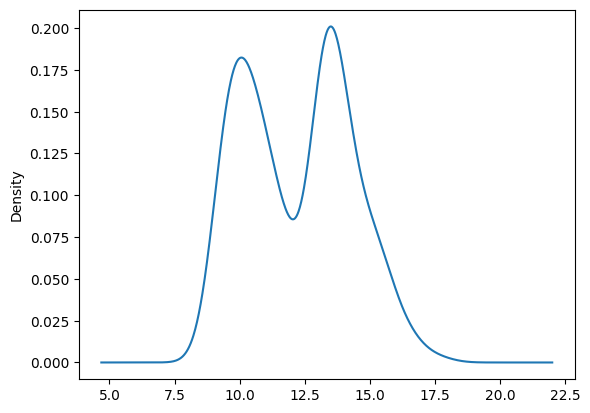

In [118]:
df = inventaire_ges[['lat', 'lon', 'log_total', 'total']]

gros_gros_pollueurs = (df['log_total']>15) #40 communes
gros_pollueurs = (df['log_total']>13)  &  (df['log_total']<=15) #530 communes
moyens_pollueurs = (df['log_total']>10)  &  (df['log_total']<=13) #15 680 communes
petits_pollueurs = (df['log_total']>9)  &  (df['log_total']<=10) #13 049 communes
petits_petits_pollueurs = (df['log_total']<=9) #6 488 communes

# Au total on compte 35 787 communes
# On souhaite avoir 500 points de mesure, on exclue d'office les très petits pollueurs 
# 500 - 40 = 460
# 460 - 100 = 360
df_equilibre = pd.concat(
    [
    df[gros_gros_pollueurs],
    df[gros_pollueurs].sample(200),
    df[moyens_pollueurs].sample(160),
    df[petits_pollueurs].sample(100)
    ])
df_equilibre['log_total'].plot(kind = 'density')

c:\Users\antoi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\antoi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


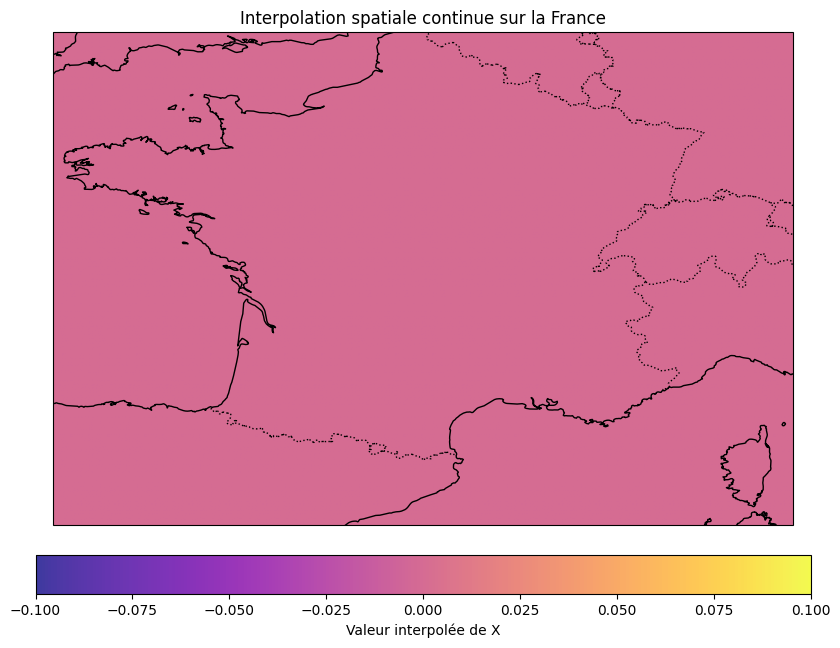

In [121]:
#Un jeu de données un peu plus important
import pandas as pd

''''
# Données simulées : longitude, latitude et variable X
data = {
    'longitude': [2.3522, 3.8772, 5.3698, -1.556, 1.4437, 7.2620, 4.8357, -0.5792,
                  6.1834, -4.4947, 4.3601, 3.0833, 1.086, -0.7393, 9.4511],
    'latitude': [48.8566, 43.6117, 43.2965, 47.2181, 43.6047, 43.7102, 45.7640, 44.8378,
                 49.1193, 48.3904, 45.775, 50.6292, 49.496, 48.0731, 42.6966],
    'X': [10, 20, 30, 15, 25, 35, 20, 30, 40, 5, 12, 22, 18, 8, 50]  # Variable d'intérêt
}

df = pd.DataFrame(data)

'''
#Paramètres
#nb_echantillon = 500
l_scale = 0.1
#Problème de méthodologie, il y a très peu de gros pollueurs et beaucoup de petits
# On n'a donc jamais une image fiable
# Un meilleure manière de sélectionner l'échantillon serait:
# --> Prendre les plus gros pollueurs
# --> Prendre prendre moins de villes peu polluantes de manière aléatoire

#df = inventaire_ges[['lat', 'lon', 'log_total']].fillna(1).sample(nb_echantillon)
df = df_equilibre
df = df.rename(columns={'lat': 'latitude','lon': 'longitude','log_total': 'X', 'total':'XX'})

import numpy as np

# Définir les limites de la France
lon_min, lon_max = -5, 10  # approx. France
lat_min, lat_max = 41, 51
resolution = 200  # Nombre de points dans chaque dimension

# Créer une grille de points
grid_lon, grid_lat = np.meshgrid(
    np.linspace(lon_min, lon_max, resolution),
    np.linspace(lat_min, lat_max, resolution)
)
grid_points = np.c_[grid_lon.ravel(), grid_lat.ravel()]

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Modèle Gaussian Process avec kernel RBF
kernel = RBF(length_scale=l_scale) #Il s'agit ici de paramètre le plus important du modèle. Plus on a de données plus il peut être petit
gp = GaussianProcessRegressor(kernel=kernel)

# Ajuster le modèle sur les points
gp.fit(df[['longitude', 'latitude']], df['X'])

# Prédire sur la grille
grid_X = gp.predict(grid_points)
grid_X = grid_X.reshape(grid_lon.shape)

#Il s'agit ici du meilleur modèle

# Création de la figure avec projection géographique
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Ajout des frontières et côtes
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)

# Afficher le dégradé continu
pcm = ax.imshow(
    grid_X, extent=(lon_min, lon_max, lat_min, lat_max),
    origin='lower', cmap='plasma', alpha=0.8, transform=ccrs.PlateCarree()
)

# Ajouter une barre de couleur
cbar = plt.colorbar(pcm, ax=ax, orientation='horizontal', pad=0.05, label='Valeur interpolée de X')

# Afficher les points originaux
#ax.scatter(df['longitude'], df['latitude'],c = df['X'], cmap='plasma', edgecolor='k', s=10, transform=ccrs.PlateCarree())

# Titre
plt.title("Interpolation spatiale continue sur la France")
plt.show()

#Remarque : pour ajuster le paramètre 'length scale', on peut utiliser la couleur du fonds:
#Si le fonds est bleu (ou valeur faible), le paramètre est trop bas
#Si le fonds est rose (ou valeur haute), le paramètre est trop haut
#Si on voit apparaître de la diffusion, alors la valeur paramètre est relativement bonne


<Axes: ylabel='Frequency'>

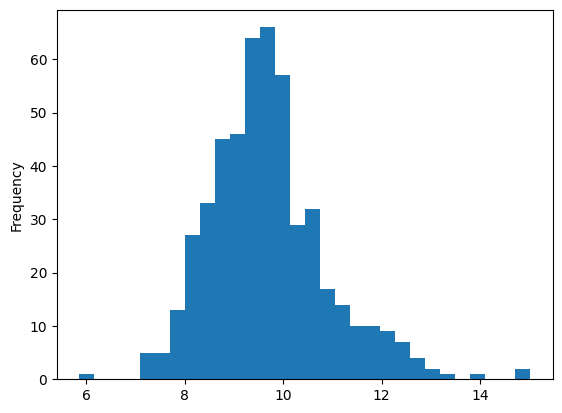

In [66]:
df['X'].plot(kind = 'hist', bins = 30)

<Axes: ylabel='Frequency'>

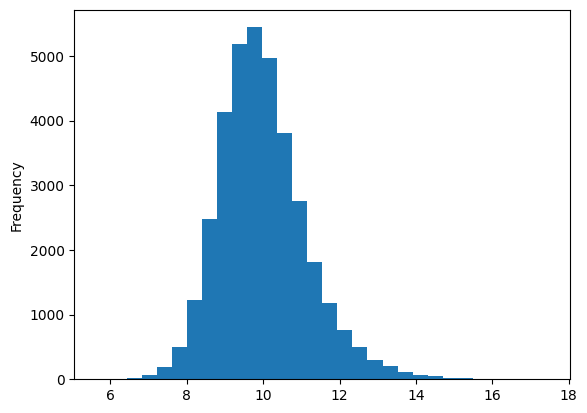

In [93]:
df = inventaire_ges[['lat', 'lon', 'log_total', 'total']]
df['log_total'].plot(kind = 'hist', bins = 30)

In [94]:
df['log_total'].describe()

count    35798.000000
mean         9.992140
std          1.147577
min          5.646180
25%          9.214155
50%          9.881938
75%         10.635738
max         17.456650
Name: log_total, dtype: float64

In [114]:
df_equilibre

,lat,lon,log_total,total
1987,43.701875,7.267464,16.055317,9.391515e+06
4357,43.475029,5.167175,15.304607,4.433087e+06
4369,43.382399,5.163688,15.637419,6.183650e+06
4382,43.436052,4.944644,17.456650,3.813527e+07
4397,43.416474,5.214355,15.231937,4.122363e+06
...,...,...,...,...
25243,45.957780,3.173010,9.885354,1.964061e+04
7932,46.027210,1.985166,9.750041,1.715494e+04
4527,49.341372,0.036073,9.883886,1.961178e+04
11419,44.252664,4.084558,9.485785,1.317116e+04
